In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

num_rows = 100
num_columns = 3

random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])

rd = random_data.copy() 

x = 'Column_1'
y = 'Column_2'
z = 'Column_3'

rd.loc[:, z] = rd[z].round()

condition = rd[z] == 1
rd.loc[condition, x] = np.sin(rd[x]) + 0.01
rd.loc[~condition, x] = np.cos(rd[x]) - 0.01

rd.loc[condition, y] = np.sin(rd[y]) * 0.1
rd.loc[~condition, y] = np.cos(rd[y]) * 0.1

training_samples = num_rows // 2


x_train = rd[x][:training_samples]
y_train = rd[y][:training_samples]
z_train = rd[z][:training_samples]

x_test = rd[x][training_samples:]
y_test = rd[y][training_samples:]
z_test = rd[z][training_samples:]

print(f"First 5 rows of Dataframe: \n{rd.head()}")

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3
0  0.531675  0.065576       1.0
1  0.528318  0.041109       1.0
2  0.433755  0.077819       1.0
3  0.384114  0.071157       1.0
4  0.832955  0.060136       0.0


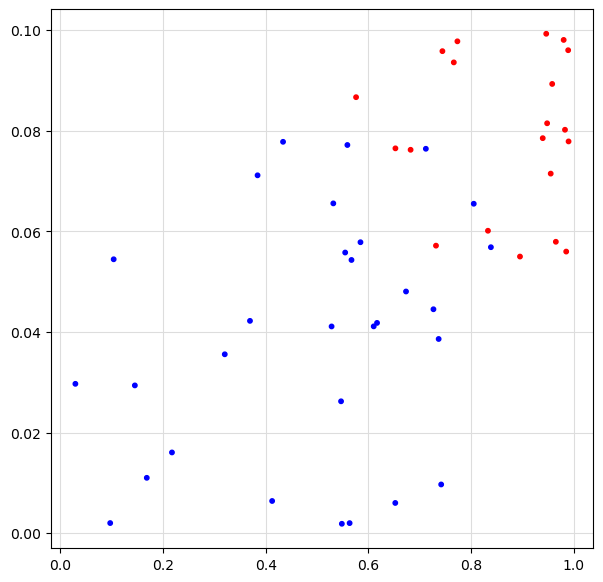

In [3]:
size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_train, y_train, c=colors, s=size, zorder=2)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [4]:
class LDA:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = None
        self.decision_boundary = None
        self.classes = None
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, x_val, y_val, z_val, dataset):
        self.classes = np.unique(z_val)
        u_x, u_y = np.mean(x_val), np.mean(y_val)
        std_x, std_y = np.std(x_val), np.std(y_val)
        x_z = (x_val - u_x) / std_x
        y_z = (y_val - u_y) / std_y
        
        rd['x_z_train'] = x_z_train
        rd['y_z_train'] = y_z_train


        class_1 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(1)], 'y_z_train': y_z_train.loc[z_train.eq(1)]})
        class_2 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(0)], 'y_z_train': y_z_train.loc[z_train.eq(0)]})
        all_classes = [class_2, class_1]
        classes_names = ['Class 2', 'Class 1']
        class_values = [0, 1]
        num_features = num_columns - 1

        

X Standardized is: 
0   -0.417998
1   -0.430775
2   -0.790672
3   -0.979601
4    0.728642
Name: Column_1, dtype: float64

Y Standardized is: 
0    0.355750
1   -0.502591
2    0.785249
3    0.551530
4    0.164895
Name: Column_2, dtype: float64

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3  x_z_train  y_z_train
0  0.531675  0.065576       1.0  -0.417998   0.355750
1  0.528318  0.041109       1.0  -0.430775  -0.502591
2  0.433755  0.077819       1.0  -0.790672   0.785249
3  0.384114  0.071157       1.0  -0.979601   0.551530
4  0.832955  0.060136       0.0   0.728642   0.164895

First 5 indices of Class 1: 
   x_z_train  y_z_train
0  -0.417998   0.355750
1  -0.430775  -0.502591
2  -0.790672   0.785249
3  -0.979601   0.551530
5  -2.072257  -1.873879

First 5 indices of Class 2: 
    x_z_train  y_z_train
4    0.728642   0.164895
8    1.299753   0.869293
9   -0.249260   1.096473
10   1.193930   0.563426
13   0.475444   1.339140


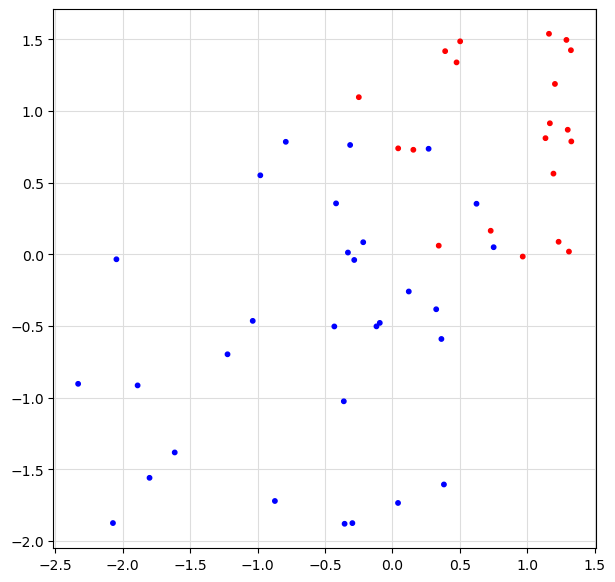

In [5]:
def standardize(x_val, y_val):
    u_x, u_y = np.mean(x_val), np.mean(y_val)
    std_x, std_y = np.std(x_val), np.std(y_val)
    x_z = (x_val - u_x) / std_x
    y_z = (y_val - u_y) / std_y
    return x_z, y_z

x_z_train, y_z_train = standardize(x_train, y_train)

rd['x_z_train'] = x_z_train
rd['y_z_train'] = y_z_train

print(f'X Standardized is: \n{x_z_train.head()}\n\nY Standardized is: \n{y_z_train.head()}')
print(f'\nFirst 5 rows of Dataframe: \n{rd.head()}')

class_1 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(1)], 'y_z_train': y_z_train.loc[z_train.eq(1)]})
class_2 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(0)], 'y_z_train': y_z_train.loc[z_train.eq(0)]})
all_classes = [class_2, class_1]
classes_names = ['Class 2', 'Class 1']
class_values = [0, 1]
num_features = num_columns - 1

print(f"\nFirst 5 indices of Class 1: \n{class_1.head()}")
print(f"\nFirst 5 indices of Class 2: \n{class_2.head()}")

size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_z_train, y_z_train, c=colors, s=size, zorder=2)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [6]:
'''
def find_W_matrix(all_classes):
    W = np.zeros((num_features, num_features), dtype=float)
    for class_values in all_classes:
        cov_matrix = np.cov(class_values[['x_z_train', 'y_z_train']], rowvar=False)
        cov_matrix *= (len(class_values) - 1)
        W += cov_matrix
    W /= training_samples - len(all_classes)
    return W
W = find_W_matrix(all_classes)
print(W)
'''

"\ndef find_W_matrix(all_classes):\n    W = np.zeros((num_features, num_features), dtype=float)\n    for class_values in all_classes:\n        cov_matrix = np.cov(class_values[['x_z_train', 'y_z_train']], rowvar=False)\n        cov_matrix *= (len(class_values) - 1)\n        W += cov_matrix\n    W /= training_samples - len(all_classes)\n    return W\nW = find_W_matrix(all_classes)\nprint(W)\n"

In [7]:
training_data = rd.iloc[:training_samples, -2:]
print(f"\nFirst 5 indices of Training Data: \n{training_data.head()}")

def find_W_matrix(training, z_val):
    training = training.reset_index(drop=True)
    z_val = z_val.reset_index(drop=True)
    classes = np.unique(z_val)
    S_W = np.zeros((training.shape[1], training.shape[1]))
    
    for k in classes:
        training_k = training.loc[z_val == k]
        mean_k = np.mean(training_k, axis=0)
        S_W += np.dot((training_k - mean_k).T, (training_k - mean_k))

    return S_W
W = find_W_matrix(training_data, z_train)

print(f'\nWithin-Class Scatter Matrix: \n{W}')


First 5 indices of Training Data: 
   x_z_train  y_z_train
0  -0.417998   0.355750
1  -0.430775  -0.502591
2  -0.790672   0.785249
3  -0.979601   0.551530
4   0.728642   0.164895

Within-Class Scatter Matrix: 
[[25.92555511  5.65876794]
 [ 5.65876794 26.70314841]]


In [8]:
def find_B_matrix(S_W, training_set, all_classes, dataset):
    training_set = training_set.to_numpy()
    S_B = np.zeros((num_features, num_features), dtype=float)
    S_T = np.cov(training_set[:, :2], rowvar=False)
    S_B = S_T - S_W
    return S_B, S_T
B, T = find_B_matrix(W, training_data, all_classes, rd)

print(f'\nBetween-Class Scatter Matrix: \n{B}')


Between-Class Scatter Matrix: 
[[-24.90514695  -5.05996743]
 [ -5.05996743 -25.68274024]]


In [9]:
def find_S(S_W, S_B):
    S_W_inv = np.linalg.inv(S_W + np.eye(S_W.shape[0]) * 1e-6)
    S_S = np.dot(S_W_inv, S_B)
    print(S_S)
    return S_S
S = find_S(W, B)

[[-0.9638639   0.0154718 ]
 [ 0.0147666  -0.96506562]]


In [10]:
eigenvalues, eigenvectors = np.linalg.eig(S)

indices = np.argsort(eigenvalues)[::-1]

print('\nEigenvalues:', eigenvalues)
print('\nEigenvectors:\n', eigenvectors)

eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]


print('\nSorted Eigenvalues:', eigenvalues)
print('\nSorted Eigenvectors:\n', eigenvectors)

first_evector = eigenvectors[:, 0]

print(f'\nFirst Eigenvector to be used as weights: {first_evector}')


Eigenvalues: [-0.94933774 -0.97959179]

Eigenvectors:
 [[ 0.72903496 -0.70127922]
 [ 0.68447646  0.71288671]]

Sorted Eigenvalues: [-0.94933774 -0.97959179]

Sorted Eigenvectors:
 [[ 0.72903496 -0.70127922]
 [ 0.68447646  0.71288671]]

First Eigenvector to be used as weights: [0.72903496 0.68447646]


In [11]:
scores = [[], [], []]
for index, value in enumerate(all_classes):
    scores[index].append((x_z_train[z_train==index] * first_evector[0]) + y_z_train[z_train==index] * first_evector[1])
    scores[-1].append((x_z_train * first_evector[0]) + (y_z_train * first_evector[1]))

var_scores = [[], []]

for index, value in enumerate(all_classes):
    var_scores[index].append(np.var(scores[index]))


total_var_scores = np.var(scores[-1]) / len(all_classes)

norm_weights = first_evector / (np.sqrt(total_var_scores))

new_scores = []
for index, value in enumerate(all_classes):
    new_scores.append((x_z_train * norm_weights[0]) + (y_z_train * norm_weights[1]))

new_var_score = np.var(new_scores[-1]) / len(all_classes)

print(f'\nThe Total Variance of the Scores is: {total_var_scores}')
print(f'\nThe Normalized Weights are: {norm_weights}')
print(f'\nThe Updated Variance of the Scores is: {new_var_score}')
print(f'\nThe Updated Scores are \n{new_scores}')


The Total Variance of the Scores is: 0.7928296909460402

The Normalized Weights are: [0.81876337 0.76872068]

The Updated Variance of the Scores is: 1.0000000000000009

The Updated Scores are 
[0    -0.068768
1    -0.739055
2    -0.043736
3    -0.378088
4     0.723343
5    -3.137178
6     0.785861
7    -0.028480
8     1.732434
9     0.638797
10    1.410663
11   -1.734738
12   -0.112157
13    1.418701
14   -1.298725
15    1.553456
16   -1.536776
17    0.779391
18   -2.383555
19    1.900433
20   -2.672516
21    2.206149
22   -0.920948
23    1.086695
24    0.652963
25    2.178272
26    2.133163
27   -2.035694
28   -1.082880
29   -1.701783
30    1.552335
31    1.409766
32   -1.683984
33    1.691605
34    0.327909
35   -0.260183
36    1.076405
37    0.603370
38   -0.156228
39    0.329712
40   -0.099781
41   -0.482812
42   -2.602030
43    1.658771
44   -2.249452
45   -0.261797
46   -0.444096
47   -1.204514
48    0.687848
49    0.781915
dtype: float64, 0    -0.068768
1    -0.739055
2    -0.0

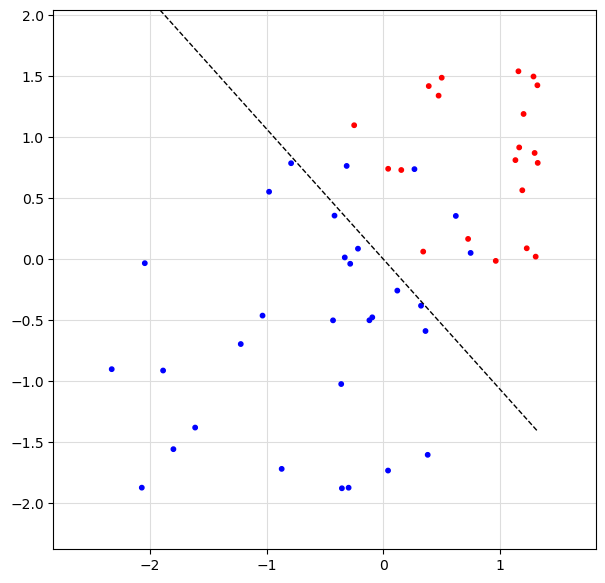

In [12]:
def decision_boundary(x_val):
    intercept = -((norm_weights[0] * np.mean(x_z_train)) + (norm_weights[1] * np.mean(y_z_train))) / norm_weights[1]
    return -(norm_weights[0] / norm_weights[1]) * x_val + intercept

x_range = np.linspace(min(x_z_train), max(x_z_train))
y_range = decision_boundary(x_range)

plt.figure(figsize=(7, 7))
threshold = 1
colors = np.where(z_train == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle ='--', label='Decision Boundary', zorder=3)
plt.scatter(x_z_train, y_z_train, c=colors, s=size, zorder=2)

plt.xlim([x_z_train.min() - 0.5, x_z_train.max() + 0.5])
plt.ylim([y_z_train.min() - 0.5, y_z_train.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [13]:
features = np.column_stack((x_z_train, y_z_train))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_train == 0].mean()
mean_class_1 = projections[z_train == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

if mean_class_1 > mean_class_2:
    accuracy = np.mean(predictions == z_train)
else:
    accuracy = 1 - np.mean(predictions == z_train)


print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 92.00%


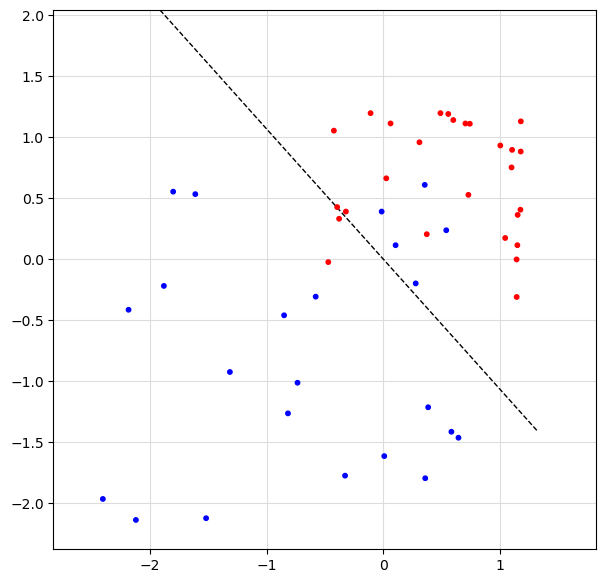

In [14]:
x_z_test, y_z_test = standardize(x_test, y_test)

plt.figure(figsize=(7, 7))
threshold = 1
colors = np.where(z_test == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle ='--', label='Decision Boundary')
plt.scatter(x_z_test, y_z_test, c=colors, s=size, zorder=2)

plt.xlim([x_z_train.min() - 0.5, x_z_train.max() + 0.5])
plt.ylim([y_z_train.min() - 0.5, y_z_train.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [15]:
features = np.column_stack((x_z_test, y_z_test))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_test == 0].mean()
mean_class_1 = projections[z_test == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

if mean_class_1 > mean_class_2:
    accuracy = np.mean(predictions == z_test)
else:
    accuracy = 1 - np.mean(predictions == z_test)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 88.00%


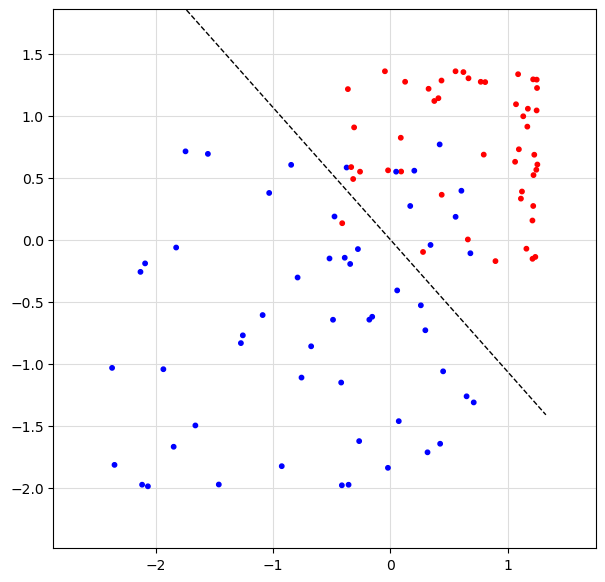

In [16]:
x_z, y_z = standardize(rd[x], rd[y])


plt.figure(figsize=(7, 7))
threshold = 1
colors = np.where(rd[z] == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle ='--', label='Decision Boundary')
plt.scatter(x_z, y_z, c=colors, s=size, zorder=2)

plt.xlim([x_z.min() - 0.5, x_z.max() + 0.5])
plt.ylim([y_z.min() - 0.5, y_z.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [17]:
features = np.column_stack((x_z, y_z))

projections = features.dot(norm_weights)

mean_class_2 = projections[rd[z] == 0].mean()
mean_class_1 = projections[rd[z] == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

if mean_class_1 > mean_class_2:
    accuracy = np.mean(predictions == rd[z])
else:
    accuracy = 1 - np.mean(predictions == rd[z])
    
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 90.00%
